__Before using the codes below, notation:__

1. for the mixture component, using a sliced-like list. (Could use the liquid volume or mass ratio)
<p>eg: Ethanol: Water: Toluene = [::] </p>

# Retrieve the wavelength for the binodal line

## Import packages and set initial parameters for the graphs

In [53]:
from dataGadgets import *

plt.rcParams['figure.figsize'] = [10,6]
plt.rcParams['figure.dpi'] = 100

# for the folder where stores the *.csv file for the different mixture.

In [54]:
# Other parameters 

plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 
plt.rcParams['font.size'] = 18
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['lines.linewidth'] = 2


## Define the folder path for the spectra

In [55]:
specFold = 'curve_fit_binodal/'

## set initial guess for the parameters, plot the original data and the fitted line

### For the mixture with the component -- Water: Toluene: Ethanol = [0:1:0]

In [56]:
# csv file format is 'vol W_ vol T_ vol E_sample no_rep no'

raw_sampleT_01 = yld_rawdata(specFold+'sampleT_pure_01.csv',6)
raw_sampleT_02 = yld_rawdata(specFold+'sampleT_pure_02.csv',6)
raw_sampleT_03 = yld_rawdata(specFold+'sampleT_pure_03.csv',6)
raw_sampleT_04 = yld_rawdata(specFold+'sampleT_pure_04.csv',6)
raw_sampleT_05 = yld_rawdata(specFold+'sampleT_pure_05.csv',6)

wv_sampleT_01,inten_sampleT_01 = yld_xy_sliced(raw_sampleT_01)
wv_sampleT_02,inten_sampleT_02 = yld_xy_sliced(raw_sampleT_02)
wv_sampleT_03,inten_sampleT_03 = yld_xy_sliced(raw_sampleT_03)
wv_sampleT_04,inten_sampleT_04 = yld_xy_sliced(raw_sampleT_04)
wv_sampleT_05,inten_sampleT_05 = yld_xy_sliced(raw_sampleT_05)

ave_wv_sampleT = np.array(wv_sampleT_01)
ave_inten_sampleT = []
std_inten_sampleT = []
for i in range(len(inten_sampleT_01)):
    singlewav_inten = [inten_sampleT_01[i],inten_sampleT_02[i],inten_sampleT_03[i],inten_sampleT_04[i],inten_sampleT_05[i]]
    std_singlewav = np.std(singlewav_inten)
    std_inten_sampleT.append(std_singlewav)
    ave_singlewav = sum(singlewav_inten)/len(singlewav_inten)
    ave_inten_sampleT.append(ave_singlewav)

sample_bg = 410
sample_end = 433

ave_wv_sampleT = ave_wv_sampleT[ave_wv_sampleT>sample_bg-1]
ave_wv_sampleT = ave_wv_sampleT[ave_wv_sampleT<sample_end+1]

fit_ave_wv_sampleT = ave_wv_sampleT.tolist()
ave_wv_sampleT = wv_sampleT_01

index_start = ave_wv_sampleT.index(fit_ave_wv_sampleT[0])
index_end = ave_wv_sampleT.index(fit_ave_wv_sampleT[-1])

fit_ave_inten_sampleT = ave_inten_sampleT[index_start:index_end+1]

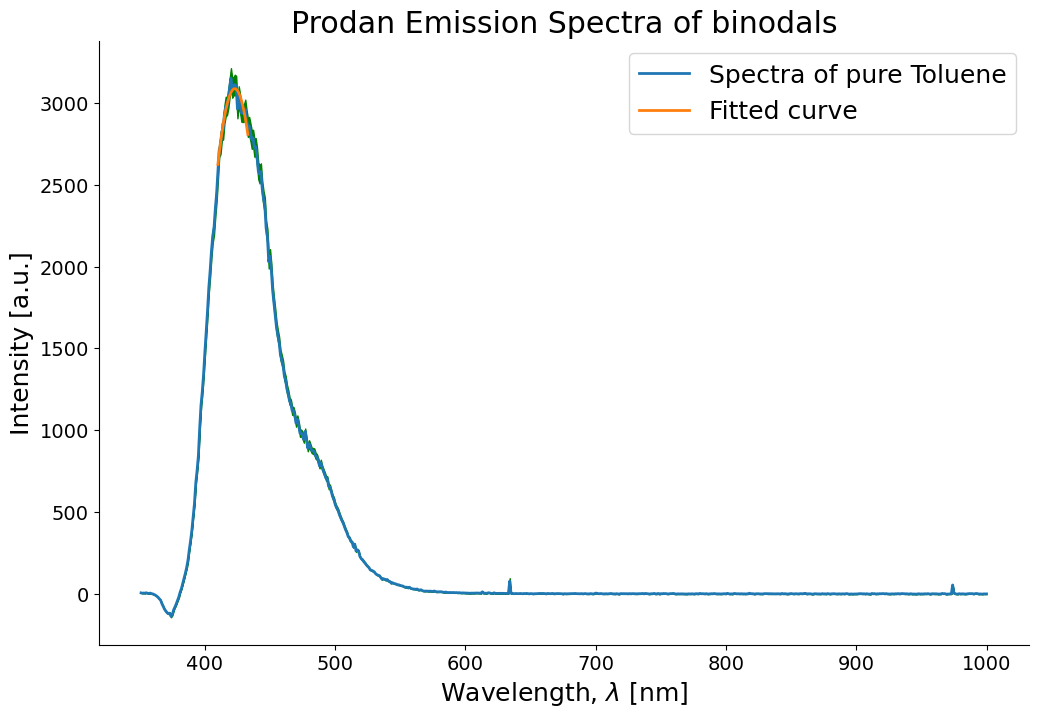

Ave. maximum wavelength for the sample is: 422.9355043525796 nm
Standard uncertainty for the max wavelength is: 0.07641070063238675


In [57]:
initGuessT = [-0.5,-500,1800]

C_fitT = yld_curve_fit_Y(para_curve,fit_ave_wv_sampleT,fit_ave_inten_sampleT,initGuessT)
f1_sampleT = C_fitT[0]
max_wav_sampleT = C_fitT[1]
cov_matrix_T = C_fitT[2]
wav_uncertain_T = cov_matrix_T[1][1]

fig1 = plt.figure(facecolor='white')
ax1 = plt.axes(frameon=True)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

plt.plot(ave_wv_sampleT,ave_inten_sampleT,marker = '',linestyle = '-',label = 'Spectra of pure Toluene')
plt.plot(fit_ave_wv_sampleT,f1_sampleT,label = 'Fitted curve')
plt.fill_between(ave_wv_sampleT, np.array(ave_inten_sampleT)-np.array(std_inten_sampleT),np.array(ave_inten_sampleT)+np.array(std_inten_sampleT), alpha=1, color = 'green')
plt.legend(loc = 'best')
plt.title('Prodan Emission Spectra of binodals')
plt.xlabel('Wavelength, $\lambda$ [nm]')
plt.ylabel('Intensity [a.u.]')
plt.show()

print('Ave. maximum wavelength for the sample is:',max_wav_sampleT,'nm')
print('Standard uncertainty for the max wavelength is:',wav_uncertain_T)


### For the mixture with the component -- Water: Toluene: Ethanol = [1:0:0]

In [60]:
# csv file format is 'vol W_ vol T_ vol E_sample no_rep no'

raw_sampleW_01 = yld_rawdata(specFold+'sampleW_pure_01.csv',6)
raw_sampleW_02 = yld_rawdata(specFold+'sampleW_pure_02.csv',6)
raw_sampleW_03 = yld_rawdata(specFold+'sampleW_pure_03.csv',6)
raw_sampleW_04 = yld_rawdata(specFold+'sampleW_pure_04.csv',6)
raw_sampleW_05 = yld_rawdata(specFold+'sampleW_pure_05.csv',6)

wv_sampleW_01,inten_sampleW_01 = yld_xy_sliced(raw_sampleW_01)
wv_sampleW_02,inten_sampleW_02 = yld_xy_sliced(raw_sampleW_02)
wv_sampleW_03,inten_sampleW_03 = yld_xy_sliced(raw_sampleW_03)
wv_sampleW_04,inten_sampleW_04 = yld_xy_sliced(raw_sampleW_04)
wv_sampleW_05,inten_sampleW_05 = yld_xy_sliced(raw_sampleW_05)

ave_wv_sampleW = np.array(wv_sampleW_01)
ave_inten_sampleW = []
std_inten_sampleW = []
for i in range(len(inten_sampleW_01)):
    singlewav_inten = [inten_sampleW_01[i],inten_sampleW_02[i],inten_sampleW_03[i],inten_sampleW_04[i],inten_sampleW_05[i]]
    std_singlewav = np.std(singlewav_inten)
    std_inten_sampleW.append(std_singlewav)
    ave_singlewav = sum(singlewav_inten)/len(singlewav_inten)
    ave_inten_sampleW.append(ave_singlewav)

sample_bg = 510
sample_end = 541

ave_wv_sampleW = ave_wv_sampleW[ave_wv_sampleW>sample_bg-1]
ave_wv_sampleW = ave_wv_sampleW[ave_wv_sampleW<sample_end+1]

fit_ave_wv_sampleW = ave_wv_sampleW.tolist()
ave_wv_sampleW = wv_sampleW_01

index_start = ave_wv_sampleW.index(fit_ave_wv_sampleW[0])
index_end = ave_wv_sampleW.index(fit_ave_wv_sampleW[-1])

fit_ave_inten_sampleW = ave_inten_sampleW[index_start:index_end+1]

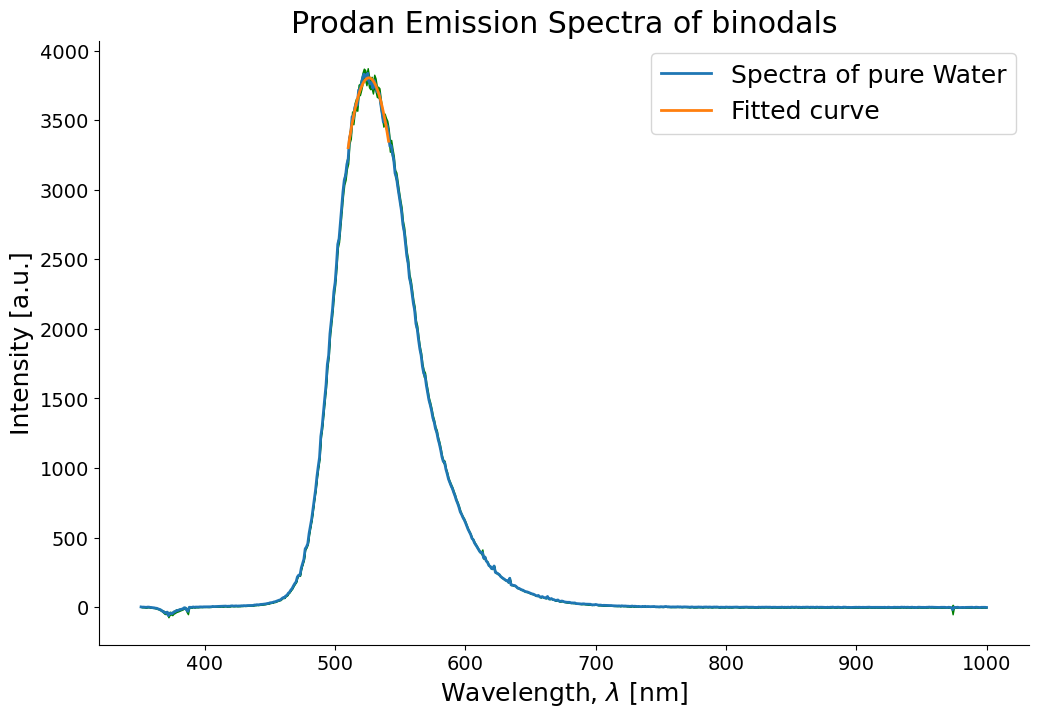

Ave. maximum wavelength for the sample is: 525.8761978466658 nm
Standard uncertainty for the max wavelength is: 0.03461827046468427


In [61]:
initGuessW = [-0.5,-500,1800]

C_fitW = yld_curve_fit_Y(para_curve,fit_ave_wv_sampleW,fit_ave_inten_sampleW,initGuessW)
f1_sampleW = C_fitW[0]
max_wav_sampleW = C_fitW[1]
cov_matrix_W = C_fitW[2]
wav_uncertain_W = cov_matrix_W[1][1]

fig1 = plt.figure(facecolor='white')
ax1 = plt.axes(frameon=True)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

plt.plot(ave_wv_sampleW,ave_inten_sampleW,marker = '',linestyle = '-',label = 'Spectra of pure Water')
plt.plot(fit_ave_wv_sampleW,f1_sampleW,label = 'Fitted curve')
plt.fill_between(ave_wv_sampleW, np.array(ave_inten_sampleW)-np.array(std_inten_sampleW),np.array(ave_inten_sampleW)+np.array(std_inten_sampleW), alpha=1, color = 'green')
plt.legend(loc = 'best')
plt.title('Prodan Emission Spectra of binodals')
plt.xlabel('Wavelength, $\lambda$ [nm]')
plt.ylabel('Intensity [a.u.]')
plt.show()

print('Ave. maximum wavelength for the sample is:',max_wav_sampleW,'nm')
print('Standard uncertainty for the max wavelength is:',wav_uncertain_W)

### For the mixture with the component -- Water: Toluene: Ethanol = [0:0:1]

In [62]:
# csv file format is 'vol W_ vol T_ vol E_sample no_rep no'

raw_sampleE_01 = yld_rawdata(specFold+'sampleE_pure_01.csv',6)
raw_sampleE_02 = yld_rawdata(specFold+'sampleE_pure_02.csv',6)
raw_sampleE_03 = yld_rawdata(specFold+'sampleE_pure_03.csv',6)
raw_sampleE_04 = yld_rawdata(specFold+'sampleE_pure_04.csv',6)
raw_sampleE_05 = yld_rawdata(specFold+'sampleE_pure_05.csv',6)

wv_sampleE_01,inten_sampleE_01 = yld_xy_sliced(raw_sampleE_01)
wv_sampleE_02,inten_sampleE_02 = yld_xy_sliced(raw_sampleE_02)
wv_sampleE_03,inten_sampleE_03 = yld_xy_sliced(raw_sampleE_03)
wv_sampleE_04,inten_sampleE_04 = yld_xy_sliced(raw_sampleE_04)
wv_sampleE_05,inten_sampleE_05 = yld_xy_sliced(raw_sampleE_05)

ave_wv_sampleE = np.array(wv_sampleE_01)
ave_inten_sampleE = []
std_inten_sampleE = []
for i in range(len(inten_sampleE_01)):
    singlewav_inten = [inten_sampleE_01[i],inten_sampleE_02[i],inten_sampleE_03[i],inten_sampleE_04[i],inten_sampleE_05[i]]
    std_singlewav = np.std(singlewav_inten)
    std_inten_sampleE.append(std_singlewav)
    ave_singlewav = sum(singlewav_inten)/len(singlewav_inten)
    ave_inten_sampleE.append(ave_singlewav)

sample_bg = 485
sample_end = 513

ave_wv_sampleE = ave_wv_sampleE[ave_wv_sampleE>sample_bg-1]
ave_wv_sampleE = ave_wv_sampleE[ave_wv_sampleE<sample_end+1]

fit_ave_wv_sampleE = ave_wv_sampleE.tolist()
ave_wv_sampleE = wv_sampleE_01

index_start = ave_wv_sampleE.index(fit_ave_wv_sampleE[0])
index_end = ave_wv_sampleE.index(fit_ave_wv_sampleE[-1])

fit_ave_inten_sampleE = ave_inten_sampleE[index_start:index_end+1]

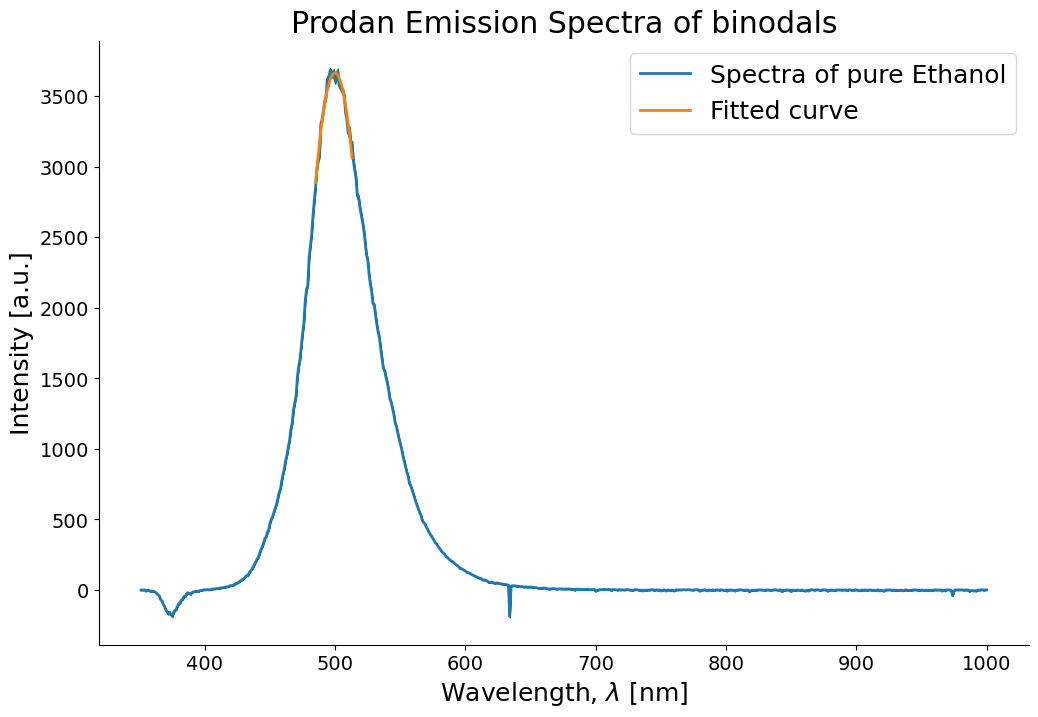

Ave. maximum wavelength for the sample is: 499.8993283322621 nm
Standard uncertainty for the max wavelength is: 0.02279364828877638


In [63]:
initGuessE = [-0.5,-500,1800]

C_fitE = yld_curve_fit_Y(para_curve,fit_ave_wv_sampleE,fit_ave_inten_sampleE,initGuessE)
f1_sampleE = C_fitE[0]
max_wav_sampleE = C_fitE[1]
cov_matrix_E = C_fitE[2]
wav_uncertain_E = cov_matrix_E[1][1]

fig1 = plt.figure(facecolor='white')
ax1 = plt.axes(frameon=True)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

plt.plot(ave_wv_sampleE,ave_inten_sampleE,marker = '',linestyle = '-',label = 'Spectra of pure Ethanol')
plt.plot(fit_ave_wv_sampleE,f1_sampleE,label = 'Fitted curve')
plt.fill_between(ave_wv_sampleE, np.array(ave_inten_sampleE)-np.array(std_inten_sampleE),np.array(ave_inten_sampleE)+np.array(std_inten_sampleE), alpha=1, color = 'green')
plt.legend(loc = 'best')
plt.title('Prodan Emission Spectra of binodals')
plt.xlabel('Wavelength, $\lambda$ [nm]')
plt.ylabel('Intensity [a.u.]')
plt.show()

print('Ave. maximum wavelength for the sample is:',max_wav_sampleE,'nm')
print('Standard uncertainty for the max wavelength is:',wav_uncertain_E)

### For the mixture with the component -- Water: Toluene: Ethanol = [4.0:25.4:22.1]

In [64]:
# csv file format is 'vol W_ vol T_ vol E_sample no_rep no'

raw_sample01_01 = yld_rawdata(specFold+'4W_25.4T_22.1E_sample01_01.csv',6)
raw_sample01_02 = yld_rawdata(specFold+'4W_25.4T_22.1E_sample01_02.csv',6)
raw_sample01_03 = yld_rawdata(specFold+'4W_25.4T_22.1E_sample01_03.csv',6)
raw_sample01_04 = yld_rawdata(specFold+'4W_25.4T_22.1E_sample01_04.csv',6)
raw_sample01_05 = yld_rawdata(specFold+'4W_25.4T_22.1E_sample01_05.csv',6)

wv_sample01_01,inten_sample01_01 = yld_xy_sliced(raw_sample01_01)
wv_sample01_02,inten_sample01_02 = yld_xy_sliced(raw_sample01_02)
wv_sample01_03,inten_sample01_03 = yld_xy_sliced(raw_sample01_03)
wv_sample01_04,inten_sample01_04 = yld_xy_sliced(raw_sample01_04)
wv_sample01_05,inten_sample01_05 = yld_xy_sliced(raw_sample01_05)

ave_wv_sample01 = np.array(wv_sample01_01)
ave_inten_sample01 = []
std_inten_sample01 = []
for i in range(len(inten_sample01_01)):
    singlewav_inten = [inten_sample01_01[i],inten_sample01_02[i],inten_sample01_03[i],inten_sample01_04[i],inten_sample01_05[i]]
    std_singlewav = np.std(singlewav_inten)
    std_inten_sample01.append(std_singlewav)
    ave_singlewav = sum(singlewav_inten)/len(singlewav_inten)
    ave_inten_sample01.append(ave_singlewav)

sample_bg = 485
sample_end = 515

ave_wv_sample01 = ave_wv_sample01[ave_wv_sample01>sample_bg-1]
ave_wv_sample01 = ave_wv_sample01[ave_wv_sample01<sample_end+1]

fit_ave_wv_sample01 = ave_wv_sample01.tolist()
ave_wv_sample01 = wv_sample01_01

index_start = ave_wv_sample01.index(fit_ave_wv_sample01[0])
index_end = ave_wv_sample01.index(fit_ave_wv_sample01[-1])

fit_ave_inten_sample01 = ave_inten_sample01[index_start:index_end+1]

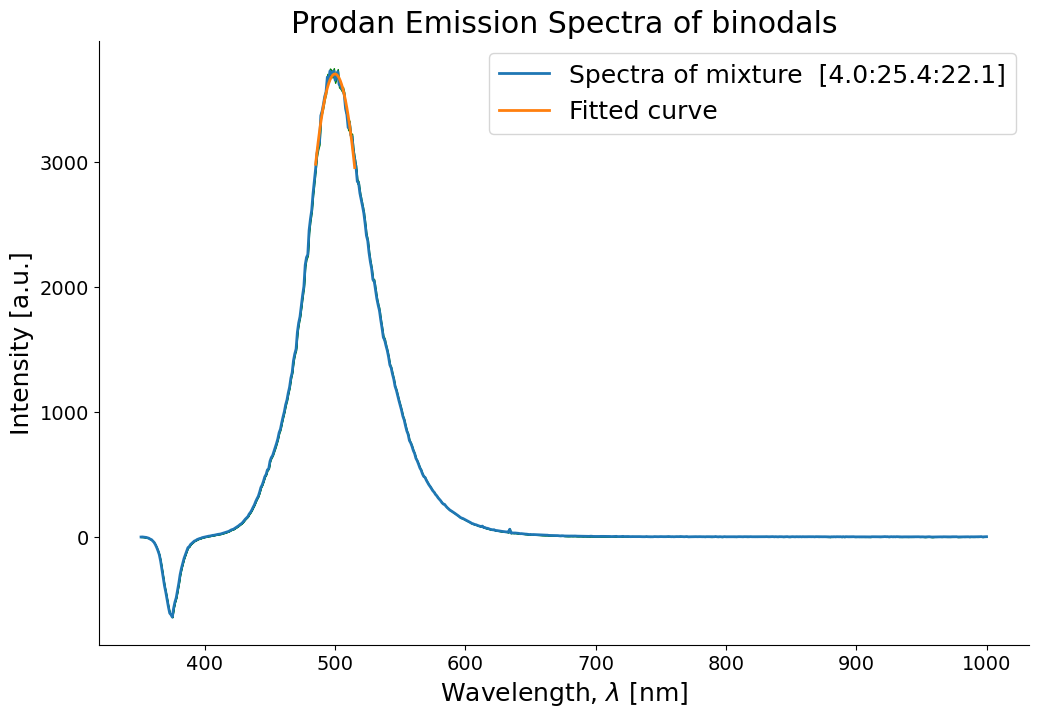

Ave. maximum wavelength for the sample is: 499.86613118560126 nm
Standard uncertainty for the max wavelength is: 0.021855326986423163


In [65]:
initGuess01 = [-0.5,-500,1800]

C_fit01 = yld_curve_fit_Y(para_curve,fit_ave_wv_sample01,fit_ave_inten_sample01,initGuess01)
f1_sample01 = C_fit01[0]
max_wav_sample01 = C_fit01[1]
cov_matrix_01 = C_fit01[2]
wav_uncertain_01 = cov_matrix_01[1][1]

fig1 = plt.figure(facecolor='white')
ax1 = plt.axes(frameon=True)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

plt.plot(ave_wv_sample01,ave_inten_sample01,marker = '',linestyle = '-',label = 'Spectra of mixture  [4.0:25.4:22.1]')
plt.plot(fit_ave_wv_sample01,f1_sample01,label = 'Fitted curve')
plt.fill_between(ave_wv_sample01, np.array(ave_inten_sample01)-np.array(std_inten_sample01),np.array(ave_inten_sample01)+np.array(std_inten_sample01), alpha=1, color = 'green')
plt.legend(loc = 'best')
plt.title('Prodan Emission Spectra of binodals')
plt.xlabel('Wavelength, $\lambda$ [nm]')
plt.ylabel('Intensity [a.u.]')
plt.show()

print('Ave. maximum wavelength for the sample is:',max_wav_sample01,'nm')
print('Standard uncertainty for the max wavelength is:',wav_uncertain_01)

### For the mixture with the component -- Water: Toluene: Ethanol = [10.0:11.5:32.8]

In [66]:
# csv file format is 'vol W_ vol T_ vol E_sample no_rep no'

raw_sample02_01 = yld_rawdata(specFold+'10W_11.5T_32.8E_sample02_01.csv',6)
raw_sample02_02 = yld_rawdata(specFold+'10W_11.5T_32.8E_sample02_02.csv',6)
raw_sample02_03 = yld_rawdata(specFold+'10W_11.5T_32.8E_sample02_03.csv',6)
raw_sample02_04 = yld_rawdata(specFold+'10W_11.5T_32.8E_sample02_04.csv',6)
raw_sample02_05 = yld_rawdata(specFold+'10W_11.5T_32.8E_sample02_05.csv',6)

wv_sample02_01,inten_sample02_01 = yld_xy_sliced(raw_sample02_01)
wv_sample02_02,inten_sample02_02 = yld_xy_sliced(raw_sample02_02)
wv_sample02_03,inten_sample02_03 = yld_xy_sliced(raw_sample02_03)
wv_sample02_04,inten_sample02_04 = yld_xy_sliced(raw_sample02_04)
wv_sample02_05,inten_sample02_05 = yld_xy_sliced(raw_sample02_05)

ave_wv_sample02 = np.array(wv_sample02_01)
ave_inten_sample02 = []
std_inten_sample02 = []
for i in range(len(inten_sample02_01)):
    singlewav_inten = [inten_sample02_01[i],inten_sample02_02[i],inten_sample02_03[i],inten_sample02_04[i],inten_sample02_05[i]]
    std_singlewav = np.std(singlewav_inten)
    std_inten_sample02.append(std_singlewav)
    ave_singlewav = sum(singlewav_inten)/len(singlewav_inten)
    ave_inten_sample02.append(ave_singlewav)

sample_bg = 488
sample_end = 517

ave_wv_sample02 = ave_wv_sample02[ave_wv_sample02>sample_bg-1]
ave_wv_sample02 = ave_wv_sample02[ave_wv_sample02<sample_end+1]

fit_ave_wv_sample02 = ave_wv_sample02.tolist()
ave_wv_sample02 = wv_sample02_01

index_start = ave_wv_sample02.index(fit_ave_wv_sample02[0])
index_end = ave_wv_sample02.index(fit_ave_wv_sample02[-1])

fit_ave_inten_sample02 = ave_inten_sample02[index_start:index_end+1]

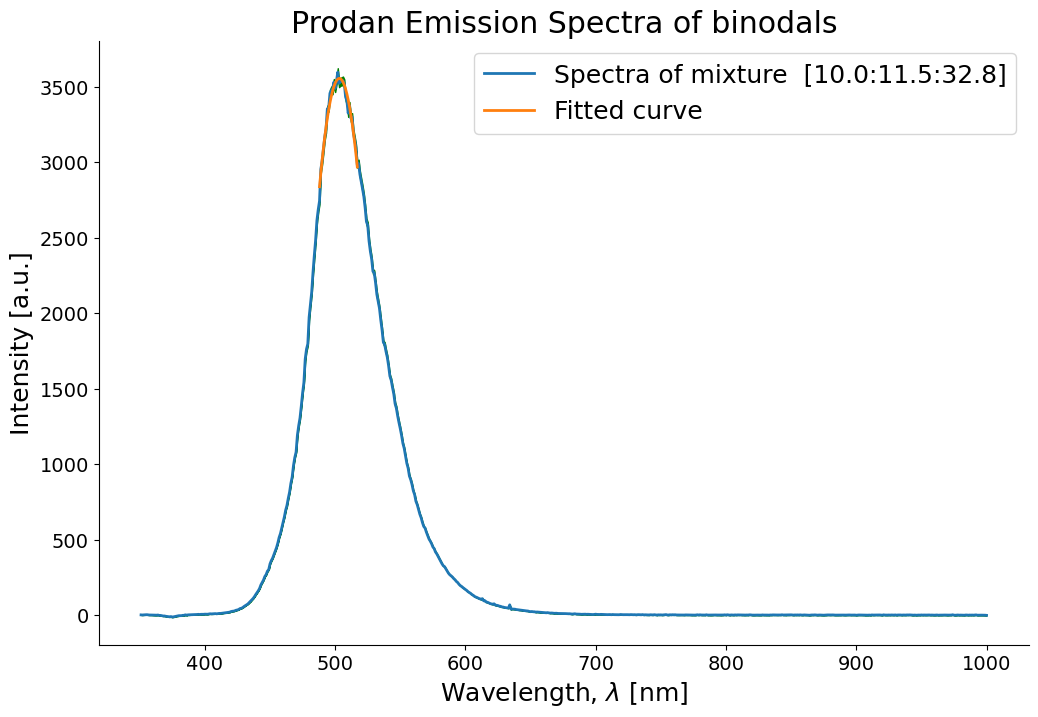

Ave. maximum wavelength for the sample is: 503.2291860278595 nm
Standard uncertainty for the max wavelength is: 0.019188636408830142


In [67]:
initGuess02 = [-0.5,-500,1800]

C_fit02 = yld_curve_fit_Y(para_curve,fit_ave_wv_sample02,fit_ave_inten_sample02,initGuess02)
f1_sample02 = C_fit02[0]
max_wav_sample02 = C_fit02[1]
cov_matrix_02 = C_fit02[2]
wav_uncertain_02 = cov_matrix_02[1][1]

fig1 = plt.figure(facecolor='white')
ax1 = plt.axes(frameon=True)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

plt.plot(ave_wv_sample02,ave_inten_sample02,marker = '',linestyle = '-',label = 'Spectra of mixture  [10.0:11.5:32.8]')
plt.plot(fit_ave_wv_sample02,f1_sample02,label = 'Fitted curve')
plt.fill_between(ave_wv_sample02, np.array(ave_inten_sample02)-np.array(std_inten_sample02),np.array(ave_inten_sample02)+np.array(std_inten_sample02), alpha=1, color = 'green')
plt.legend(loc = 'best')
plt.title('Prodan Emission Spectra of binodals')
plt.xlabel('Wavelength, $\lambda$ [nm]')
plt.ylabel('Intensity [a.u.]')
plt.show()

print('Ave. maximum wavelength for the sample is:',max_wav_sample02,'nm')
print('Standard uncertainty for the max wavelength is:',wav_uncertain_02)

### For the mixture with the component -- Water: Toluene: Ethanol = [10.0:4.9:24.6]

In [70]:
# csv file format is 'vol W_ vol T_ vol E_sample no_rep no'

raw_sample03_01 = yld_rawdata(specFold+'10W_4.9T_24.6E_sample03_01.csv',6)
raw_sample03_02 = yld_rawdata(specFold+'10W_4.9T_24.6E_sample03_02.csv',6)
raw_sample03_03 = yld_rawdata(specFold+'10W_4.9T_24.6E_sample03_03.csv',6)
raw_sample03_04 = yld_rawdata(specFold+'10W_4.9T_24.6E_sample03_04.csv',6)
raw_sample03_05 = yld_rawdata(specFold+'10W_4.9T_24.6E_sample03_05.csv',6)

wv_sample03_01,inten_sample03_01 = yld_xy_sliced(raw_sample03_01)
wv_sample03_02,inten_sample03_02 = yld_xy_sliced(raw_sample03_02)
wv_sample03_03,inten_sample03_03 = yld_xy_sliced(raw_sample03_03)
wv_sample03_04,inten_sample03_04 = yld_xy_sliced(raw_sample03_04)
wv_sample03_05,inten_sample03_05 = yld_xy_sliced(raw_sample03_05)

ave_wv_sample03 = np.array(wv_sample03_01)
ave_inten_sample03 = []
std_inten_sample03 = []
for i in range(len(inten_sample03_01)):
    singlewav_inten = [inten_sample03_01[i],inten_sample03_02[i],inten_sample03_03[i],inten_sample03_04[i],inten_sample03_05[i]]
    std_singlewav = np.std(singlewav_inten)
    std_inten_sample03.append(std_singlewav)
    ave_singlewav = sum(singlewav_inten)/len(singlewav_inten)
    ave_inten_sample03.append(ave_singlewav)

sample_bg = 490
sample_end = 520

ave_wv_sample03 = ave_wv_sample03[ave_wv_sample03>sample_bg-1]
ave_wv_sample03 = ave_wv_sample03[ave_wv_sample03<sample_end+1]

fit_ave_wv_sample03 = ave_wv_sample03.tolist()
ave_wv_sample03 = wv_sample03_01

index_start = ave_wv_sample03.index(fit_ave_wv_sample03[0])
index_end = ave_wv_sample03.index(fit_ave_wv_sample03[-1])

fit_ave_inten_sample03 = ave_inten_sample03[index_start:index_end+1]

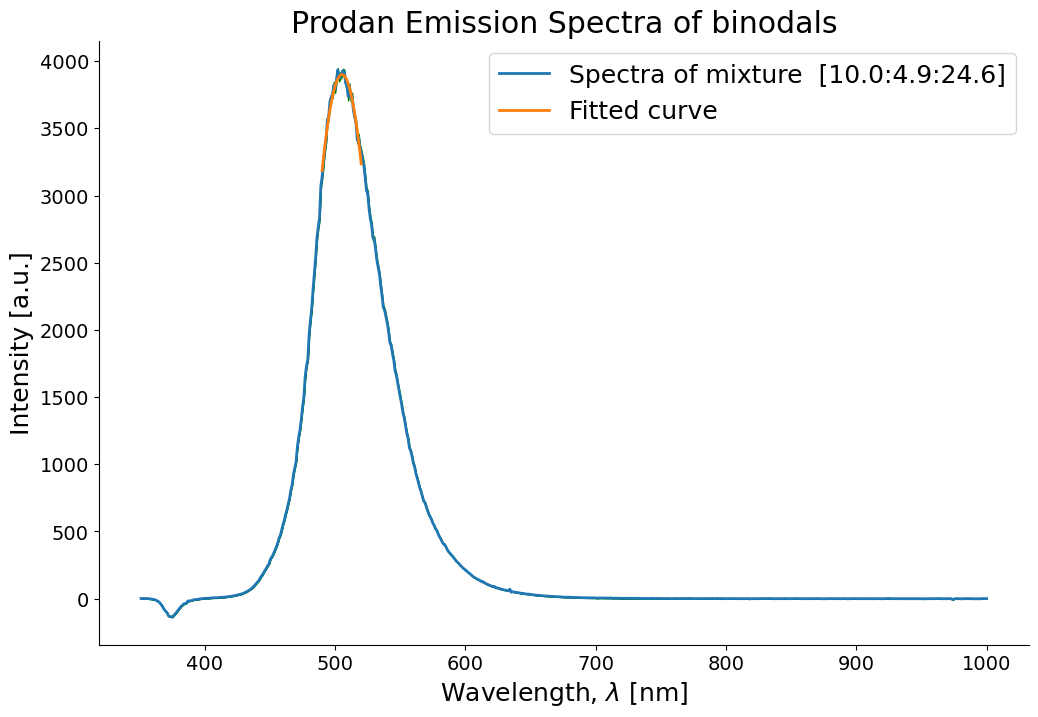

Ave. maximum wavelength for the sample is: 505.27211932698685 nm
Standard uncertainty for the max wavelength is: 0.020529912153696674


In [71]:
initGuess03 = [-0.5,-500,1800]

C_fit03 = yld_curve_fit_Y(para_curve,fit_ave_wv_sample03,fit_ave_inten_sample03,initGuess03)
f1_sample03 = C_fit03[0]
max_wav_sample03 = C_fit03[1]
cov_matrix_03 = C_fit03[2]
wav_uncertain_03 = cov_matrix_03[1][1]

fig1 = plt.figure(facecolor='white')
ax1 = plt.axes(frameon=True)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

plt.plot(ave_wv_sample03,ave_inten_sample03,marker = '',linestyle = '-',label = 'Spectra of mixture  [10.0:4.9:24.6]')
plt.plot(fit_ave_wv_sample03,f1_sample03,label = 'Fitted curve')
plt.fill_between(ave_wv_sample03, np.array(ave_inten_sample03)-np.array(std_inten_sample03),np.array(ave_inten_sample03)+np.array(std_inten_sample03), alpha=1, color = 'green')
plt.legend(loc = 'best')
plt.title('Prodan Emission Spectra of binodals')
plt.xlabel('Wavelength, $\lambda$ [nm]')
plt.ylabel('Intensity [a.u.]')
plt.show()

print('Ave. maximum wavelength for the sample is:',max_wav_sample03,'nm')
print('Standard uncertainty for the max wavelength is:',wav_uncertain_03)

### For the mixture with the component -- Water: Toluene: Ethanol = [16.5:1.0:16.7]

In [72]:
# csv file format is 'vol W_ vol T_ vol E_sample no_rep no'

raw_sample04_01 = yld_rawdata(specFold+'16.5W_1T_16.7E_sample04_01.csv',6)
raw_sample04_02 = yld_rawdata(specFold+'16.5W_1T_16.7E_sample04_02.csv',6)
raw_sample04_03 = yld_rawdata(specFold+'16.5W_1T_16.7E_sample04_03.csv',6)
raw_sample04_04 = yld_rawdata(specFold+'16.5W_1T_16.7E_sample04_04.csv',6)
raw_sample04_05 = yld_rawdata(specFold+'16.5W_1T_16.7E_sample04_05.csv',6)

wv_sample04_01,inten_sample04_01 = yld_xy_sliced(raw_sample04_01)
wv_sample04_02,inten_sample04_02 = yld_xy_sliced(raw_sample04_02)
wv_sample04_03,inten_sample04_03 = yld_xy_sliced(raw_sample04_03)
wv_sample04_04,inten_sample04_04 = yld_xy_sliced(raw_sample04_04)
wv_sample04_05,inten_sample04_05 = yld_xy_sliced(raw_sample04_05)

ave_wv_sample04 = np.array(wv_sample04_01)
ave_inten_sample04 = []
std_inten_sample04 = []
for i in range(len(inten_sample04_01)):
    singlewav_inten = [inten_sample04_01[i],inten_sample04_02[i],inten_sample04_03[i],inten_sample04_04[i],inten_sample04_05[i]]
    std_singlewav = np.std(singlewav_inten)
    std_inten_sample04.append(std_singlewav)
    ave_singlewav = sum(singlewav_inten)/len(singlewav_inten)
    ave_inten_sample04.append(ave_singlewav)

sample_bg = 493
sample_end = 528

ave_wv_sample04 = ave_wv_sample04[ave_wv_sample04>sample_bg-1]
ave_wv_sample04 = ave_wv_sample04[ave_wv_sample04<sample_end+1]

fit_ave_wv_sample04 = ave_wv_sample04.tolist()
ave_wv_sample04 = wv_sample04_01

index_start = ave_wv_sample04.index(fit_ave_wv_sample04[0])
index_end = ave_wv_sample04.index(fit_ave_wv_sample04[-1])

fit_ave_inten_sample04 = ave_inten_sample04[index_start:index_end+1]

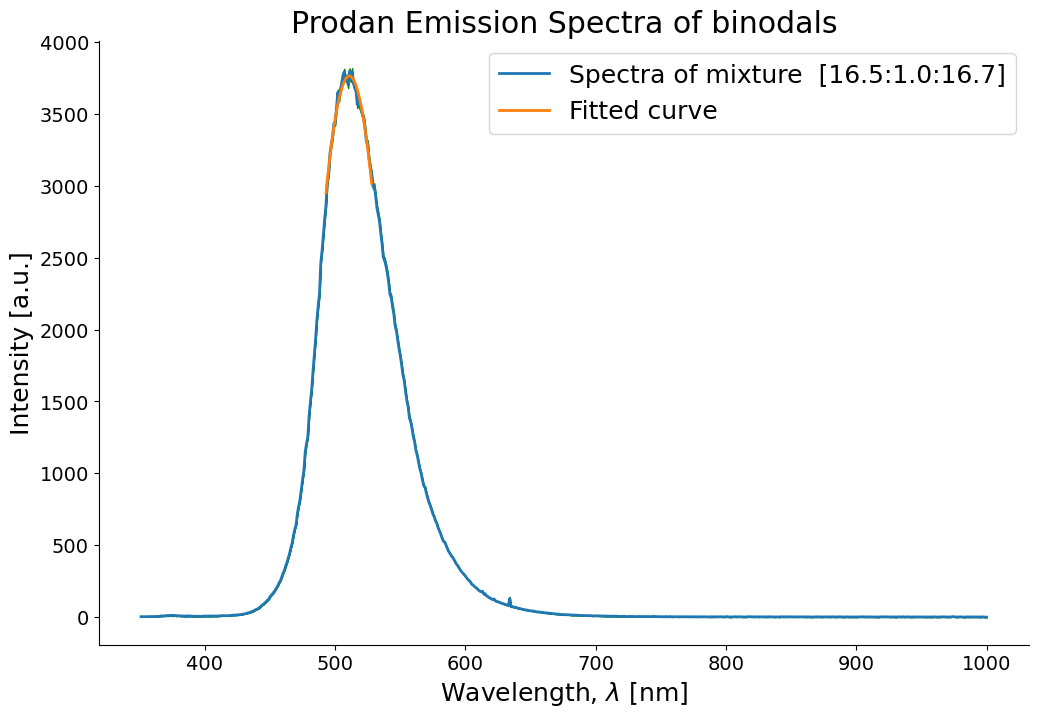

Ave. maximum wavelength for the sample is: 510.8732689650792 nm
Standard uncertainty for the max wavelength is: 0.018182935712715547


In [73]:
initGuess04 = [-0.5,-500,1800]

C_fit04 = yld_curve_fit_Y(para_curve,fit_ave_wv_sample04,fit_ave_inten_sample04,initGuess04)
f1_sample04 = C_fit04[0]
max_wav_sample04 = C_fit04[1]
cov_matrix_04 = C_fit04[2]
wav_uncertain_04 = cov_matrix_04[1][1]

fig1 = plt.figure(facecolor='white')
ax1 = plt.axes(frameon=True)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

plt.plot(ave_wv_sample04,ave_inten_sample04,marker = '',linestyle = '-',label = 'Spectra of mixture  [16.5:1.0:16.7]')
plt.plot(fit_ave_wv_sample04,f1_sample04,label = 'Fitted curve')
plt.fill_between(ave_wv_sample04, np.array(ave_inten_sample04)-np.array(std_inten_sample04),np.array(ave_inten_sample04)+np.array(std_inten_sample04), alpha=1, color = 'green')
plt.legend(loc = 'best')
plt.title('Prodan Emission Spectra of binodals')
plt.xlabel('Wavelength, $\lambda$ [nm]')
plt.ylabel('Intensity [a.u.]')
plt.show()

print('Ave. maximum wavelength for the sample is:',max_wav_sample04,'nm')
print('Standard uncertainty for the max wavelength is:',wav_uncertain_04)

## Plot all the data on the same graph.

In [74]:
ave_wav_samples = [max_wav_sample01,max_wav_sample02,max_wav_sample03,max_wav_sample04]
std_wav_samples = [wav_uncertain_01,wav_uncertain_02,wav_uncertain_03,wav_uncertain_04]

print(ave_wav_samples)
print(std_wav_samples)

[499.86613118560126, 503.2291860278595, 505.27211932698685, 510.8732689650792]
[0.021855326986423163, 0.019188636408830142, 0.020529912153696674, 0.018182935712715547]


In [75]:
print(max_wav_sampleW)
print(max_wav_sampleT)
print(max_wav_sampleE)

525.8761978466658
422.9355043525796
499.8993283322621


| Mass fraction ethanol | Mass fraction water | Mass fraction toluene | $\lambda_{max}$ / nm |
|:-:|:-:|:-:|:-:|
| 1 | 0 | 0 | 499.8993283322621 |
| 0 | 0 | 1 | 422.9355043525796 |
| 0.347 | 0.033 | 0.620 | 490.5 |
| 0.562 | 0.132 | 0.306 | 496.9 |
| 0.624 | 0.195 | 0.181 | 499.2 |
| 0.401 | 0.093 | 0.506 | 499.86613118560126 |
| 0.564 | 0.219 | 0.217 | 503.2291860278595 |
| 0.567 | 0.369 | 0.064 | 503.4 |
| 0.576 | 0.298 | 0.126 | 505.27211932698685 |
| 0.43 | 0.542 | 0.028 | 510.8732689650792 |
| 0 | 1 | 0 | 525.8761978466658 |

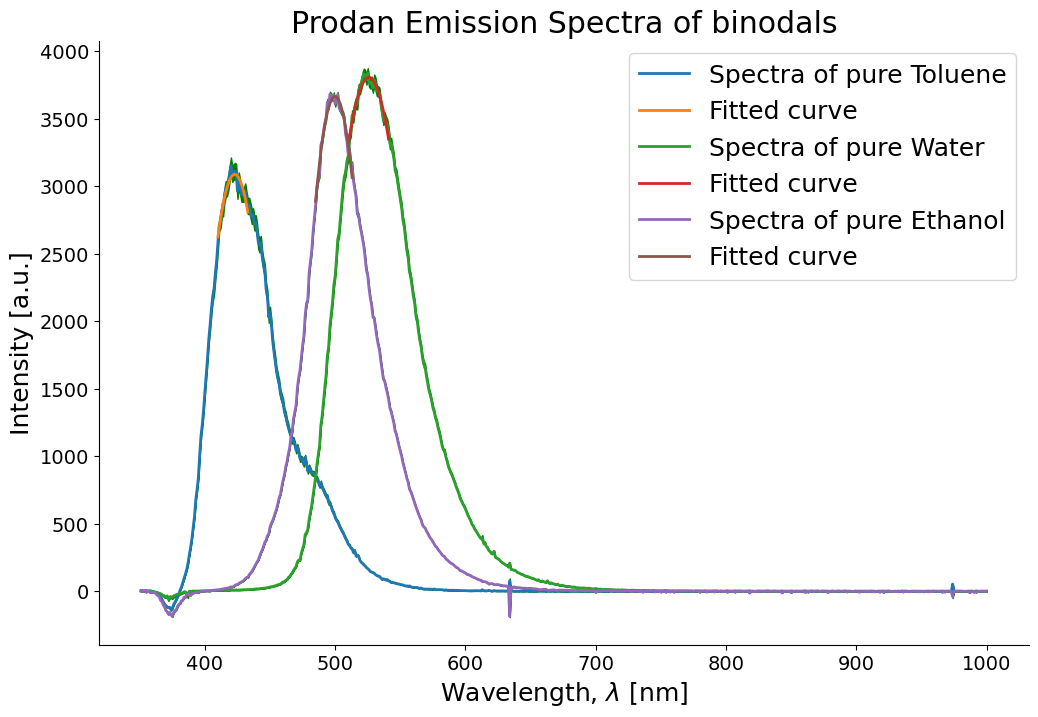

In [76]:
fig1 = plt.figure(facecolor='white')
ax1 = plt.axes(frameon=True)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

plt.plot(ave_wv_sampleT,ave_inten_sampleT,marker = '',linestyle = '-',label = 'Spectra of pure Toluene')
plt.plot(fit_ave_wv_sampleT,f1_sampleT,label = 'Fitted curve')
plt.fill_between(ave_wv_sampleT, np.array(ave_inten_sampleT)-np.array(std_inten_sampleT),np.array(ave_inten_sampleT)+np.array(std_inten_sampleT), alpha=1, color = 'green')
plt.plot(ave_wv_sampleW,ave_inten_sampleW,marker = '',linestyle = '-',label = 'Spectra of pure Water')
plt.plot(fit_ave_wv_sampleW,f1_sampleW,label = 'Fitted curve')
plt.fill_between(ave_wv_sampleW, np.array(ave_inten_sampleW)-np.array(std_inten_sampleW),np.array(ave_inten_sampleW)+np.array(std_inten_sampleW), alpha=1, color = 'green')
plt.plot(ave_wv_sampleE,ave_inten_sampleE,marker = '',linestyle = '-',label = 'Spectra of pure Ethanol')
plt.plot(fit_ave_wv_sampleE,f1_sampleE,label = 'Fitted curve')
plt.fill_between(ave_wv_sampleE, np.array(ave_inten_sampleE)-np.array(std_inten_sampleE),np.array(ave_inten_sampleE)+np.array(std_inten_sampleE), alpha=1, color = 'green')
plt.legend(loc = 'best')
plt.title('Prodan Emission Spectra of binodals')
plt.xlabel('Wavelength, $\lambda$ [nm]')
plt.ylabel('Intensity [a.u.]')
plt.show()

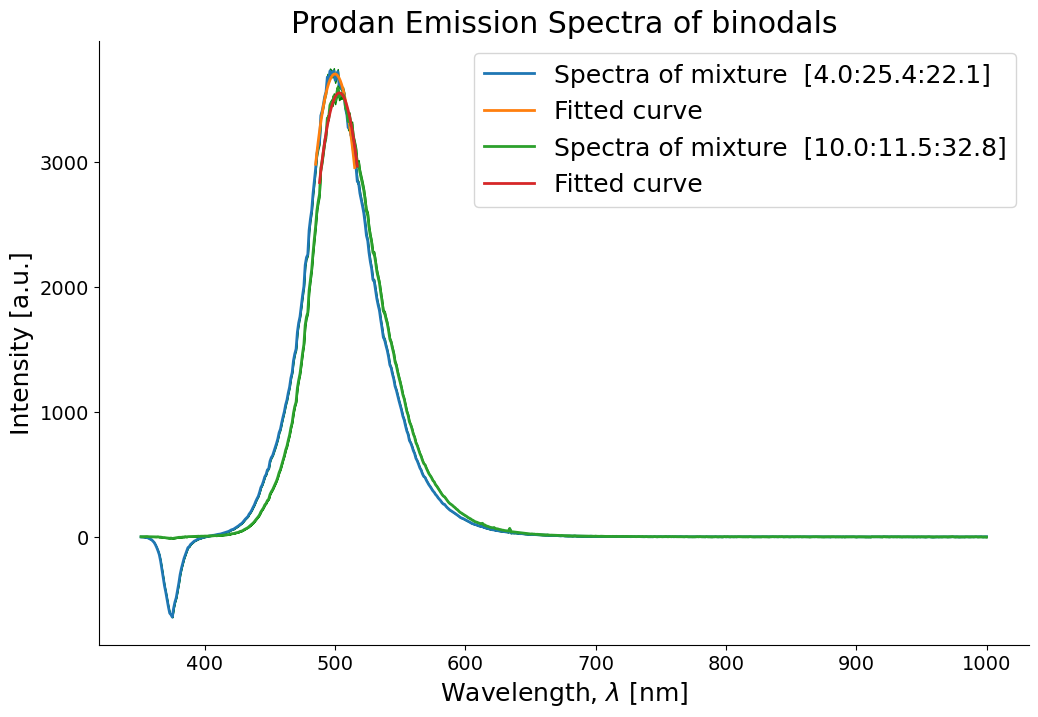

In [77]:
fig1 = plt.figure(facecolor='white')
ax1 = plt.axes(frameon=True)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

plt.plot(ave_wv_sample01,ave_inten_sample01,marker = '',linestyle = '-',label = 'Spectra of mixture  [4.0:25.4:22.1]')
plt.plot(fit_ave_wv_sample01,f1_sample01,label = 'Fitted curve')
plt.fill_between(ave_wv_sample01, np.array(ave_inten_sample01)-np.array(std_inten_sample01),np.array(ave_inten_sample01)+np.array(std_inten_sample01), alpha=1, color = 'green')
plt.plot(ave_wv_sample02,ave_inten_sample02,marker = '',linestyle = '-',label = 'Spectra of mixture  [10.0:11.5:32.8]')
plt.plot(fit_ave_wv_sample02,f1_sample02,label = 'Fitted curve')
plt.fill_between(ave_wv_sample02, np.array(ave_inten_sample02)-np.array(std_inten_sample02),np.array(ave_inten_sample02)+np.array(std_inten_sample02), alpha=1, color = 'green')

plt.legend(loc = 'best')
plt.title('Prodan Emission Spectra of binodals')
plt.xlabel('Wavelength, $\lambda$ [nm]')
plt.ylabel('Intensity [a.u.]')
plt.show()

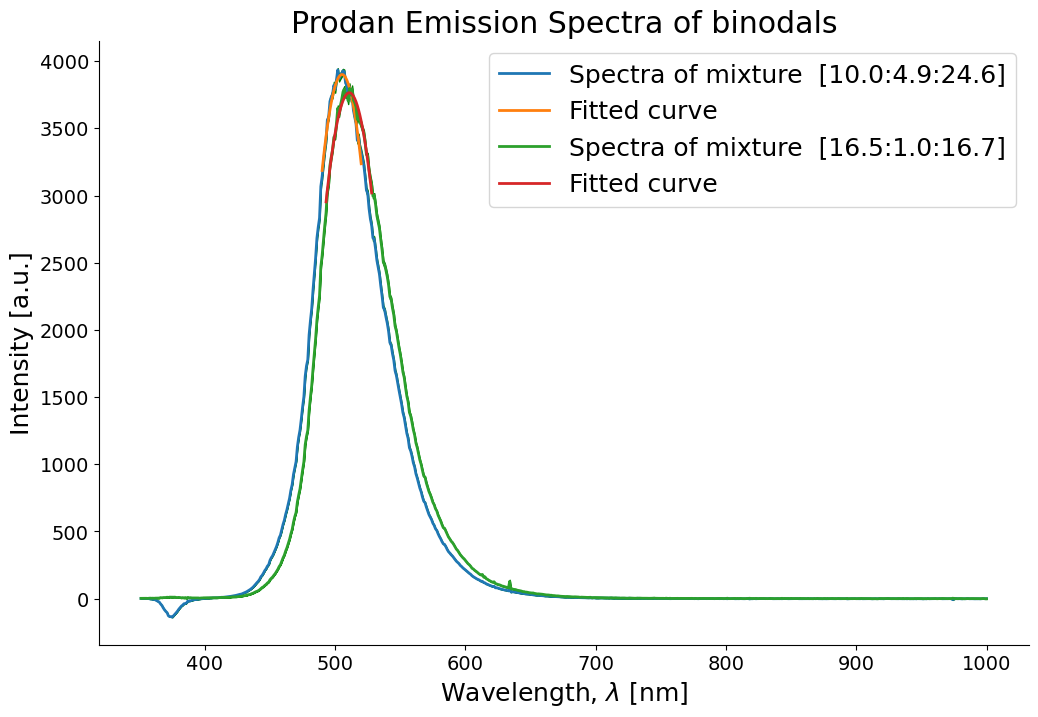

In [78]:
fig1 = plt.figure(facecolor='white')
ax1 = plt.axes(frameon=True)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

plt.plot(ave_wv_sample03,ave_inten_sample03,marker = '',linestyle = '-',label = 'Spectra of mixture  [10.0:4.9:24.6]')
plt.plot(fit_ave_wv_sample03,f1_sample03,label = 'Fitted curve')
plt.fill_between(ave_wv_sample03, np.array(ave_inten_sample03)-np.array(std_inten_sample03),np.array(ave_inten_sample03)+np.array(std_inten_sample03), alpha=1, color = 'green')
plt.plot(ave_wv_sample04,ave_inten_sample04,marker = '',linestyle = '-',label = 'Spectra of mixture  [16.5:1.0:16.7]')
plt.plot(fit_ave_wv_sample04,f1_sample04,label = 'Fitted curve')
plt.fill_between(ave_wv_sample04, np.array(ave_inten_sample04)-np.array(std_inten_sample04),np.array(ave_inten_sample04)+np.array(std_inten_sample04), alpha=1, color = 'green')

plt.legend(loc = 'best')
plt.title('Prodan Emission Spectra of binodals')
plt.xlabel('Wavelength, $\lambda$ [nm]')
plt.ylabel('Intensity [a.u.]')
plt.show()